The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The mean squared error when sampling=0 is 0.4678087264540485:


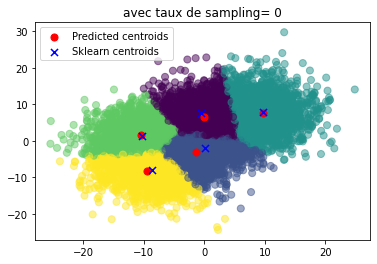

The mean squared error when sampling=0.5 is 0.9482668675880888:


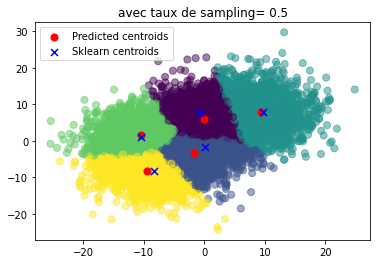

The mean squared error when sampling=0.99 is 6.758200334799523:


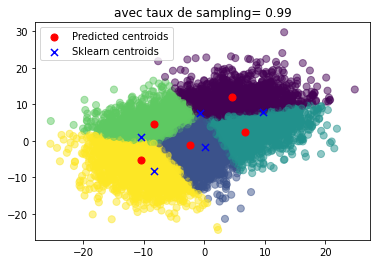

In [4]:
%load_ext autoreload
%autoreload 2
from kmeans import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans



n_clusters=5


#generation des données
X, y_true, real_centers = make_blobs(n_samples=10000, centers=n_clusters,cluster_std=5, random_state=3,return_centers=True)


samplings=[0,0.5,0.99]

for sampling in samplings:
    #execution du Kmeans implementé
    predicted_centroids, predicted_labels = KM(X, n_clusters,sampling,random_seed=2,nb_iterations=10)

    #execution du kmeans de sklearn
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    centroids_sklearn = kmeans.cluster_centers_


    success_score=score(predicted_centroids,centroids_sklearn)

    print("The mean squared error when sampling={} is {}:".format(sampling,success_score))

    #afficher les points de chaque cluster d'une couleur differente
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=predicted_labels,s=50,alpha=0.5);


    plt.scatter(predicted_centroids[:, 0], predicted_centroids[:, 1], marker='o', c='r', s=50, label="Predicted centroids")
    plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], marker='x', c='b', s=50, label="Sklearn centroids")
    plt.legend()
    plt.title("avec taux de sampling= {}".format( sampling))
    plt.show()



# import du MNIST dataset

In [15]:
from sklearn.datasets import fetch_openml
from Serialization import *


if do_storage_exists("mnist_X"):
    X=restore("mnist_X")
    y_true=restore("mnist_y")
else:
    #generation des données
    X, y_true = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
    store("mnist_X",X)
    store("mnist_y",y_true)


# Comparaison

In [22]:
%load_ext autoreload
%autoreload 2
from kmeans import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from sklearn.datasets import fetch_openml
from sklearn import metrics

X=restore("mnist_X")
n_clusters=10
nb_iterations=10

samplings=[0,0.99]

#execution du kmeans de sklearn
kmeans = KMeans(n_clusters=n_clusters).fit(X)
centroids_sklearn = kmeans.cluster_centers_

for sampling in samplings:
    #execution du Kmeans implementé
    predicted_centroids, predicted_labels = KM(X, n_clusters,sampling,random_seed=2,nb_iterations=nb_iterations)

    print("************************************")
    print("For sampling=", sampling, "we have:")
    print("************************************")
    print("***Rand index***")
    print("Our algo versus true labels = ", metrics.rand_score(y_true, predicted_labels))
    print("Our algo versus Sklearn labels = ", metrics.rand_score(kmeans.labels_,predicted_labels))
    print("True labels versus Sklearn labels = ", metrics.rand_score(y_true, kmeans.labels_))
    
    print("***ami***")
    print("Our algo versus true labels = ", metrics.adjusted_mutual_info_score(y_true, predicted_labels))
    print("Our algo versus Sklearn labels = ", metrics.adjusted_mutual_info_score(kmeans.labels_,predicted_labels))
    print("True labels versus Sklearn labels = ", metrics.adjusted_mutual_info_score(y_true, kmeans.labels_))
    #success_score=score(predicted_centroids,centroids_sklearn)

    #print("The mean squared error when sampling={} is {}:".format(sampling,success_score))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
************************************
For sampling= 0 we have:
************************************
***Rand index***
Our algo versus true labels =  0.8817688587387983
Our algo versus Sklearn labels =  0.9469977285389791
True labels versus Sklearn labels =  0.8840146769443645
***ami***
Our algo versus true labels =  0.48176053581273226
Our algo versus Sklearn labels =  0.7760822409839454
True labels versus Sklearn labels =  0.4845863799011127
************************************
For sampling= 0.99 we have:
************************************
***Rand index***
Our algo versus true labels =  0.8866000702050846
Our algo versus Sklearn labels =  0.9393011226690994
True labels versus Sklearn labels =  0.8840146769443645
***ami***
Our algo versus true labels =  0.48233832838447466
Our algo versus Sklearn labels =  0.7442207099078465
True labels versus Sklearn labels =  0.4845863799011127


Our algo versus true labels =  1.0


In [13]:
from sklearn import metrics
print(metrics.rand_score(y_true, predicted_labels))
print(metrics.rand_score(y_true, kmeans.labels_))
print(metrics.rand_score(kmeans.labels_,predicted_labels))


0.8809646741892231
0.8819053480355842
0.9145028871841027


In [37]:
from sklearn.datasets import fetch_openml
from Serialization import *


n_clusters=10
nb_iterations=10
name='squared_mean_error_MNIST_Dataset_Sklearn_Vs_Local_as_Sampling_Increases,nb_iteration_{},nb_clusters_{}'.format(nb_iterations,n_clusters)

mse=[]
sampling=0
while sampling <1:
    print("sampling=",sampling, flush=True, end='\r')
    #######################################################################################################
    #execution du Kmeans implementé
    predicted_centroids, predicted_labels = KM(X, n_clusters,sampling,random_seed=2,nb_iterations=nb_iterations)

    #execution du kmeans de sklearn
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    centroids_sklearn = kmeans.cluster_centers_


    success_score=score(predicted_centroids,centroids_sklearn)
    mse.append(success_score)
    print("The mean squared error when sampling={} is {}:".format(sampling,success_score))

    sampling=round(sampling+0.1,1)


The mean squared error when sampling=0 is 77.22323197217918:
The mean squared error when sampling=0.1 is 108.07901327685654:
The mean squared error when sampling=0.2 is 77.81642875287258:
The mean squared error when sampling=0.3 is 112.19013451862945:
The mean squared error when sampling=0.4 is 109.53930689250012:
The mean squared error when sampling=0.5 is 110.31750065175164:
The mean squared error when sampling=0.6 is 110.72826112841453:
The mean squared error when sampling=0.7 is 106.33481718781417:
The mean squared error when sampling=0.8 is 109.8413184321243:
The mean squared error when sampling=0.9 is 104.12500580328928:


In [38]:
n=10
print(n,"first predicted labels :",predicted_labels[:n])
print(n,"first sklearn labels :", kmeans.labels_[:n])
print(n,"first true labels :", y_true[:n])
from collections import Counter

result = zip(predicted_labels, y_true)
concatenated=list(result)
c=Counter(concatenated)
c.most_common(10)
#print(Counter(predicted_labels))

10 first predicted labels : [1 1 6 0 8 9 4 1 4 5]
[7 4 0 3 6 9 2 7 2 6]
['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']


[((4, '1'), 6032),
 ((3, '6'), 5495),
 ((9, '2'), 4745),
 ((7, '3'), 4713),
 ((2, '0'), 4138),
 ((0, '8'), 3584),
 ((5, '7'), 3057),
 ((8, '9'), 2854),
 ((8, '7'), 2835),
 ((6, '4'), 2645)]

In [53]:
import numpy as np

T = 10
n = 100

print("Broadcast:", T*n)

borne = 40
bias = .3

n_tirage = 30

depassement = np.zeros(n_tirage)
for r in range(n_tirage):
    count_target = np.zeros(T)
    choose_majority_target = np.random.random(n) < bias
    # majority target is the last one
    n_majority_target = choose_majority_target.sum()
    n_other_targets = n - n_majority_target
    count_target[T-1] = n_majority_target
    other_targets = np.random.choice(range(T-1), size=n_other_targets)
    for t in range(T-1):
        count_target[t] = (other_targets == t).sum()
    if np.any(count_target > borne):
        depassement[r] = 1

print("Pourcentage de depassement:", depassement.sum() / n_tirage)
print("Cout padding:", n + borne * T)
print("Cout padding (eq dummies):", n + borne * T - 2 * n)

Broadcast: 1000
Pourcentage de depassement: 0.03333333333333333
Cout padding: 500
Cout padding (eq dummies): 300


0.8817688587387983
0.8821579038884229
0.9162989548830289
